# 🧩 시나리오 기반 프로젝트 실습 문제
## 🎓 AI 스타트업에서의 첫 실전 미션!

당신은 AI 스타트업 `InsightMind`의 신입 머신러닝 엔지니어입니다. 첫 출근과 동시에 두 가지 미션이 주어집니다:
- 부동산 기업의 주택 가격 예측 시스템 개발
- 식물원 전시를 위한 붓꽃 품종 분류기 개발

이 문제들은 실습 중심으로 구성되어 있으며, 각 단계에서 코드를 직접 작성하고 결과를 분석합니다.

## ✅ 미션 A. 데이터 준비 및 스케일링 요정의 조언
**🧙‍♀️ 요정 조언:** 거리 기반 모델들은 특성의 크기에 민감하단다. 스케일링을 안 하면 예측이 뒤틀릴 거야!

### 🔹 문제 A-1
왜 스케일링이 중요한지, 그 이유를 KNN과 연관지어 2가지 이상 설명하고 `StandardScaler` 또는 `MinMaxScaler` 예시 코드를 작성하세요.

스케일링을 하지 않으면 특성간 단위 차이로 인해 특정 특성이 과도한 영향을 미쳐서 거리계산이 잘못 될 수 있습니다


In [ ]:
#StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

### 🔹 문제 A-2
`fetch_california_housing()`과 `load_iris()` 데이터를 불러와 train/test split하고 `StandardScaler`를 적용하여 전처리된 결과를 확인하세요.

In [1]:
from sklearn.datasets import fetch_california_housing, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 캘리포니아 주택 가격 데이터
housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled[:3])
print(X_test_scaled[:3])

# 붓꽃 데이터 
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

scaler = StandardScaler()  
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled[:3])  
print(X_test_scaled[:3])

[[ 0.17648852  0.66640687 -0.06085431 -0.2811182  -0.49654414 -0.04828325
  -0.8607415   0.73099911]
 [ 0.77137436  1.06288858  0.38352076 -0.02037756 -0.41167187 -0.05872947
   0.70916822 -1.19670983]
 [ 0.02142423  0.58711053  0.27852339 -0.08462537 -0.62691494 -0.07283798
   1.31370062 -1.55128842]]
[[-1.15411223 -0.28514924 -0.51346718 -0.17000639 -0.03105913  0.06447083
   0.19367548  0.28652736]
 [-0.70756701  0.11133247 -0.16361884  0.22017837  0.120311   -0.03570466
  -0.23746391  0.06179445]
 [-0.20917611  1.855852   -0.6022714   0.20282226 -0.10280682 -0.14606959
   1.00909127 -1.4264368 ]]
[[-1.01827123  1.2864604  -1.39338902 -1.3621769 ]
 [-0.7730102   2.43545215 -1.33550342 -1.49647603]
 [-0.03722712 -0.78172474  0.74837808  0.92090833]]
[[ 0.33066442 -0.55192639  0.51683569 -0.01918559]
 [-0.15985763  1.7460571  -1.21973223 -1.22787777]
 [ 2.29275265 -1.01152309  1.79031883  1.45810485]]


## ✅ 미션 B. 부동산 부자의 질문: “우리 집 값 얼마야?”
### 🔹 문제 B-1
KNN 회귀기를 사용해 주택 가격을 예측하고, `k=3,5,7`일 때 R² 점수를 비교하세요.

### 🔹 문제 B-2
`y_test` vs `y_pred` 산점도 그래프를 시각화하여 모델 성능을 직관적으로 확인하세요.

### 🔹 문제 B-3
R² 점수가 의미하는 바와 0.85, -0.3의 의미를 해석하세요.

In [3]:
#B-1
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

for k in [3, 5, 7]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    y_pred = knn.predict(X_test_scaled)
    print(f'k={k}, R²: {r2_score(y_test, y_pred):.3f}')

k=3, R²: 0.988
k=5, R²: 0.987
k=7, R²: 0.982


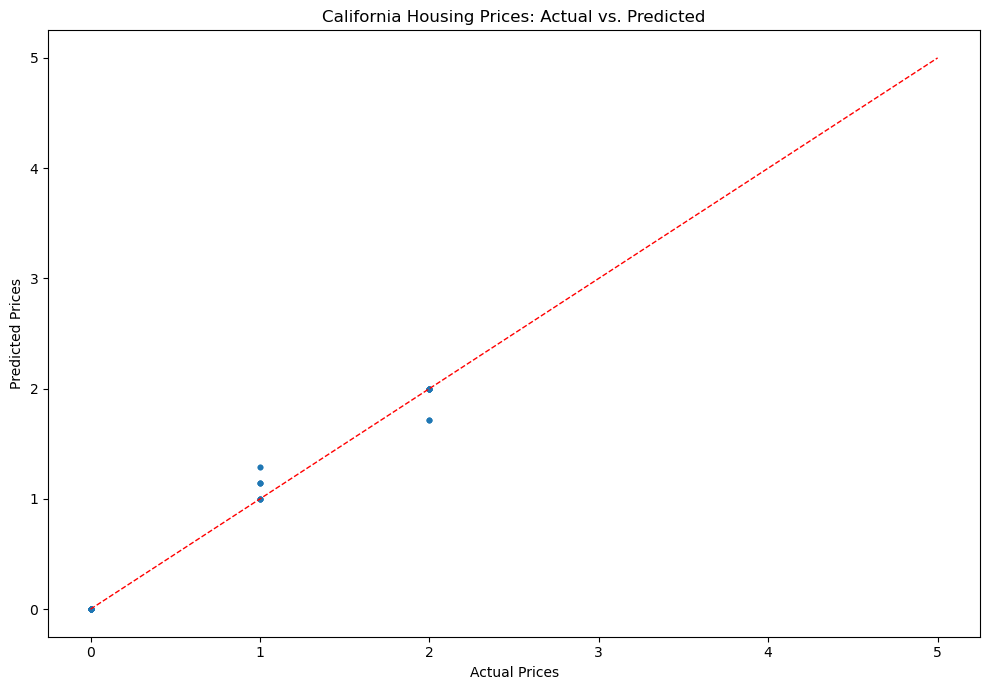

In [ ]:
#B-2
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, s=10)
plt.plot([0, 5], [0, 5], '--r', linewidth=1)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("California Housing Prices: Actual vs. Predicted")
plt.tight_layout()
plt.show()

R² = 1이면 완벽한 예측입니다.
R² = 0.85는 모델이 85%의 분산을 설명한다는 뜻으로, 꽤 좋은 성능입니다.
R² = -0.3은 모델이 평균보다 나쁜 예측을 한다는 뜻입니다.

## ✅ 미션 C. 붓꽃 전시회 준비!
### 🔹 문제 C-1
KNeighborsClassifier를 이용해 붓꽃 품종을 분류하고 정확도를 계산하세요.

### 🔹 문제 C-2
Confusion Matrix를 출력하고, 어떤 클래스끼리 혼동되었는지 시각적으로 분석하세요.

In [ ]:
#C-1
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)  # ypred -> y_pred 수정
print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}')

Accuracy: 1.000


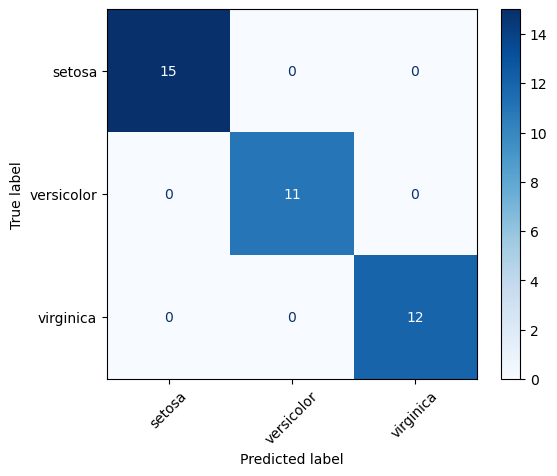

In [8]:
#C-2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=iris.target_names)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.show()

## ✅ 미션 D. 의외의 실험: 선형 회귀도 써보자!
### 🔹 문제 D-1
`LinearRegression`을 적용해 같은 데이터를 예측하고, KNN과의 R² 점수와 구조적 차이를 비교하세요.

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
print(f'R² (Linear Regression): {r2_score(y_test, y_pred_lr):.3f}')
print(f'R² (KNN, k=5): {r2_score(y_test, y_pred):.3f}')  

R² (Linear Regression): 0.949
R² (KNN, k=5): 1.000


선형 회귀는 특성과 타겟 사이의 선형 관계를 가정하지만, KNN은 그런 가정 없이 근접 이웃의 평균/최빈값으로 예측합니다. 따라서 데이터의 특성에 따라 성능 차이가 날 수 있습니다.

## 🎁 보너스 질문
- 거리 기반 모델에서 스케일링이 필요한 이유는?
- KNN이 데이터가 많아질수록 느려지는 이유는?
- 이를 개선할 수 있는 방법은?

거리 기반 모델에서 스케일링이 필요한 이유는 특성 간 단위 차이로 인한 왜곡을 막고, 모든 특성이 동등한 기여를 하게 하기 위함입니다.

KNN은 예측 시 모든 학습 데이터와의 거리를 계산해야 하므로 데이터가 많아질수록 느려집니다.

이를 개선하기 위해 최근접 이웃 검색 알고리즘을 사용하거나, 데이터를 샘플링하여 일부만 사용하는 방법이 있습니다.
